In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import r_regression
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

# Boston Housing Dataset

In [32]:
fileloc = './BostonHousing.csv'
housing = pd.read_csv(fileloc) #read the file
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


## Data Preprocessing

In [33]:
housing.isnull().sum()

CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
LSTAT        0
MEDV         0
CAT. MEDV    0
dtype: int64

In [34]:
housing = housing.rename(columns={'CRIM':'CrimeRate','ZN':'Zoned','INDUS':'Non_Retail','CHAS':'Riverside',
                                  'NOX':'NitricOxide','RM':'Rooms','AGE':'Age','DIS':'Dist_Centre',
                                  'RAD':'Accessibility_Index','TAX':'tax','PTRATIO':'Pupil_Teacher',
                                  'LSTAT':'Lower_Stat%','MEDV': 'House_Value' , 'CAT. MEDV': 'Cat_Value' })
housing.head()
#renaming the columns of the dataset

,CrimeRate,Zoned,Non_Retail,Riverside,NitricOxide,Rooms,Age,Dist_Centre,Accessibility_Index,tax,Pupil_Teacher,Lower_Stat%,House_Value,Cat_Value
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


In [35]:
housingStd= StandardScaler()
housingStd.fit(housing)
housingScaled =housingStd.transform(housing)
columns_names=housing.columns

In [36]:
housingScaled =pd.DataFrame(housingScaled,columns=columns_names)
housingScaled.head()

,CrimeRate,Zoned,Non_Retail,Riverside,NitricOxide,Rooms,Age,Dist_Centre,Accessibility_Index,tax,Pupil_Teacher,Lower_Stat%,House_Value,Cat_Value
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,-1.075562,0.159686,-0.446153
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,-0.492439,-0.101524,-0.446153
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,-1.208727,1.324247,2.241386
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,-1.361517,1.182758,2.241386
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,-1.026501,1.487503,2.241386


In [37]:
housingScaledX = housingScaled.drop('House_Value',axis=1,inplace=False)
housingScaledY = housingScaled['House_Value'].values

housingX_train,housingX_test,housingy_train,housingy_test = train_test_split(housingScaledX,housingScaledY,test_size=.25,random_state=1)

## 1) Simple Model (1 variable)

In [38]:
housing_SimpleX_train = housingX_train[['Lower_Stat%']].values
housing_SimpleY_train = housingy_train
housing_SimpleX_test = housingX_test[['Lower_Stat%']].values
housing_SimpleY_test = housingy_test

In [39]:
housingModel1 = LinearRegression()
housingModel1.fit(housing_SimpleX_train, housing_SimpleY_train)

LinearRegression()

In [40]:
housingModel1.score(housing_SimpleX_train, housing_SimpleY_train)

0.54669561040895

In [41]:
housingModel1.score(housing_SimpleX_test, housing_SimpleY_test)

0.5327362954644816

In [42]:
print("Beta1 =", housingModel1.coef_)

Beta1 = [-0.70705514]


In [43]:
print("Beta0 =", housingModel1.intercept_)

Beta0 = 0.007574411507998768


Comments:

1) The independent variable 'Lower_Stat%' was chosen after testing all independent variables for the one that gave the highest score (R-squared) in the above code. Lower Status corresponds to the economic status of the neighborhood and seems practical to have a high weightage in determining the value of the house(Dependent Variable). 


2) A model that is underfit will have high training and high testing error while an overfit model will have extremely low training error but a high testing error. Here in this case, both training and testing data have low R-squared scores . which means the errors are high. When both the training and testing errors are high, the model is UNDERFITTING.

## 2) Medium Complexity  Model (2 or 3 variables)

In [44]:
housing_MediumX_train = housingX_train[['Lower_Stat%','Rooms','Cat_Value']].values
housing_MediumY_train = housingy_train
housing_MediumX_test = housingX_test[['Lower_Stat%','Rooms','Cat_Value']].values
housing_MediumY_test = housingy_test

In [45]:
housingModel2 = LinearRegression()
housingModel2.fit(housing_MediumX_train, housing_MediumY_train)

LinearRegression()

In [46]:
housingModel2.score(housing_MediumX_train, housing_MediumY_train)

0.7893152490563671

In [47]:
housingModel2.score(housing_MediumX_test, housing_MediumY_test)

0.8171281266246253

In [48]:
print("Beta1 , Beta2, Beta3 =", housingModel2.coef_)

Beta1 , Beta2, Beta3 = [-0.43848086  0.04535816  0.52128149]


In [49]:
print("Beta0 =", housingModel2.intercept_)

Beta0 = -0.0015226239219982979


Comments

In both training and testing, the R-Squared values have considerably increased from the Simple Model (model-1) with single explanatory variable to Medium model( model 2) with more than one explanatory variables. This suggests that the training and testing errors have also reduced from model 1 to model 2. In other words, by increasing the number of variables, the underfitting problem was reduced from model 1 to model 2, therefore the performance is better. But the testing accuracy is higher than the training accuracy, which means that the model is not overfitting and hence there is still scope of adding more variables to the model even better.


In model 1, we took just one variable 'Lower_Stat%' with the parameter estimate (or co-efficient) as -0.707. In model 2, the co-effecient of 'Lower_Stat%' has weightage decreased to -0.43 when taken along with other relevant variables.


To answer this, let us consider the independent variable 'Lower_Stat%' that's included in the model. The parameter estimate or the co-efficient of this variable is -0.36 This means it has a negative impact on the House Value(dependent variable), i.e, if the percentage of lower status population is higher (economic status of the neighborhood is low), the neighborhood is 'poorer' making the value of the house LOWER and vice-versa. 


## 3) Ridge Model (all variables)


In [50]:
housing_RidgeX = housingScaled[['CrimeRate','Zoned','Non_Retail','Riverside','NitricOxide','Rooms','Age','Dist_Centre',
                                  'Accessibility_Index','tax','Pupil_Teacher','Lower_Stat%','Cat_Value']].values
housing_RidgeY = housingScaled['House_Value'].values

In [51]:
housingModel3 = Ridge(alpha=1.0)
#higher value of alpha results in an output where all co-efficients are zero. Hence taking a less agressive alpha value.

housingModel3.fit(housing_RidgeX, housing_RidgeY)

Ridge()

In [52]:
# define model evaluation method
CrossValidation2 = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores2 = cross_val_score(housingModel3, housing_RidgeX, housing_RidgeY, scoring='neg_mean_absolute_percentage_error', cv=CrossValidation2)
print(' Mean MAPE: %.3f' % (np.mean(scores2)))

 Mean MAPE: -1.586


In [53]:
housingModel3.score(housing_RidgeX, housing_RidgeY)

0.8415046287897521

In [54]:
print("Betas =", housingModel3.coef_)

Betas = [-0.12060743 -0.0134131   0.08257737  0.06546057 -0.1912816   0.08247432
 -0.01956687 -0.16694512  0.18864171 -0.16640035 -0.13072268 -0.36985509
  0.47732521]


In [55]:
print("Beta0 =", housingModel3.intercept_)

Beta0 = -7.241126254334743e-16


For this dataset, Ridge seemed to be a better model than Lasso, because :

-For Lasso, even when the alpha(=0.005) value is small, the overall performance R-square (score) of Lasso was lesser than that of Ridge, showing that Ridge model has higher performance for a more aggressive alpha value( alpha= 1).

-Also in Lasso, even by reducing the alpha to 0.005, none of the independent variables have co-efficients zero. This may indicate that all independent variables are important in the model and none can be eliminated through the Lasso method. Therefore, Ridge model is considered.



## 4) Models Comparision

In [56]:
# Define X and y using the airfares Data
housing_SimpleX = housingScaled[['Lower_Stat%']].values
housing_SimpleY = housingScaled['House_Value'].values
housing_MediumX = housingScaled[['Lower_Stat%','Rooms','Cat_Value']].values
housing_MediumY = housingScaled['House_Value'].values

In [57]:
housingMAPE_Model1 = cross_val_score(housingModel1, housing_SimpleX, housing_SimpleY, scoring='neg_mean_absolute_percentage_error', cv=CrossValidation2)
housingMAPE_Model2 = cross_val_score(housingModel2, housing_MediumX, housing_MediumY, scoring='neg_mean_absolute_percentage_error', cv=CrossValidation2)
housingMAPE_Model3 = cross_val_score(housingModel3, housing_RidgeX, housing_RidgeY, scoring='neg_mean_absolute_percentage_error', cv=CrossValidation2)

In [58]:
print('MAPE of Simple Model: %.3f' % (np.mean(housingMAPE_Model1)))
print('MAPE of Medium Complexity Model: %.3f' % (np.mean(housingMAPE_Model2)))
print('MAPE of Ridge Model: %.3f' % (np.mean(housingMAPE_Model3)))
print('\n Ridge Model gives the least error out of all the three models. ')

MAPE of Simple Model: -2.932
MAPE of Medium Complexity Model: -1.859
MAPE of Ridge Model: -1.586

 Ridge Model gives the least error out of all the three models. 


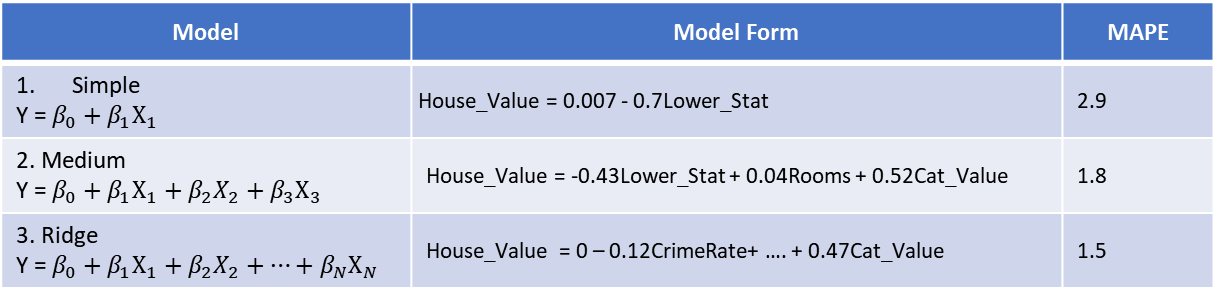